In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_path = "../data/fig8.npz"
subtitles = ["$\mathregular{I_1}$ = 1, $\mathregular{I_2}$ = 3", "$\mathregular{I_1}$ = 1, $\mathregular{I_2}$ = 6"]
xlabel = "Log (base 10) Scaled\nTransition Probability $\mathregular{tprob_1}$"
ylabel = "Average Top-5 Loss"
colors = ['blue', 'red', '#808080', 'black']
labels = ['DQN', 'MDP', 'Baseline', 'Lower Bound']
markers = ['^', 'o', 'P', 'X']
markersize = 15

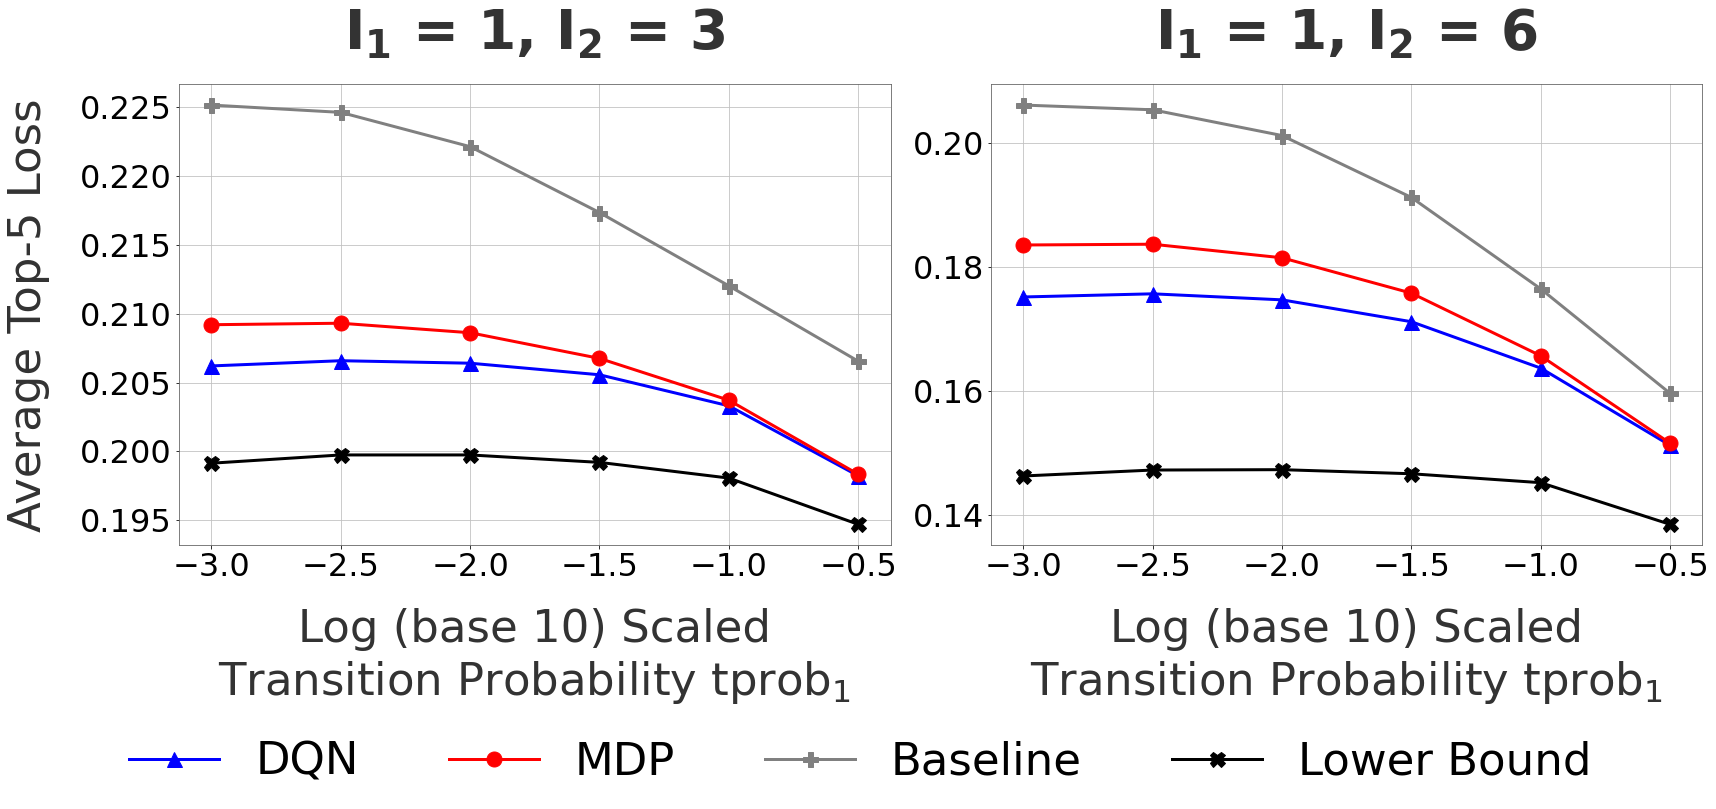

In [3]:
# Create the plot
plt.rc("font", family="DejaVu Sans")
plt.rcParams['figure.figsize'] = (24, 10)
fig, _ = plt.subplots()
ax0, ax1 = plt.subplot(1,2,1), plt.subplot(1,2,2)
axes = [ax0, ax1]

# Configure the subplot setting
for ax, subtitle in zip(axes, subtitles):
    ax.tick_params(axis='x', labelsize=32)
    ax.tick_params(axis='y', labelsize=32)
    ax.yaxis.grid(True, color='#C0C0C0')
    ax.xaxis.grid(True, color='#C0C0C0')
    ax.spines['top'].set_color('#606060')
    ax.spines['bottom'].set_color('#606060')
    ax.spines['left'].set_color('#606060')
    ax.spines['right'].set_color('#606060')
    ax.set_title(subtitle, pad=35, color='#333333', size=55, weight='bold')
    ax.set_xlabel(xlabel, labelpad=25, color='#333333', size=45)
axes[0].set_ylabel(ylabel, labelpad=30, color='#333333', size=45)

# Retrieve data from npz file
npz_data = np.load(data_path)
xdata, ydata = np.arange(-3, 0, 0.5), list()
for dqn, mdp, base, lb in zip(npz_data['dqn'], npz_data['mdp'], npz_data['baseline'], npz_data['lower_bound']):
    pdata = np.zeros((4, 6))
    pdata[0], pdata[1], pdata[2] = dqn[:-1], mdp[:-1], base[:-1]
    pdata[3] = lb[:-1]
    ydata.append(pdata)

# Plot the simulation data
for i in range(len(axes)):
    lines = list()
    for dat, color, marker in zip(ydata[i], colors, markers):
        line, = axes[i].plot(xdata, dat, linewidth=3, color=color)
        lines.append(line)
        if marker:
            line.set_marker(marker); line.set_markersize(markersize)

fig.legend(lines, labels, loc='lower center', bbox_to_anchor=(0.5, -0.15), prop={'size': 45}, ncol=4, frameon=False)
plt.tight_layout()
plt.savefig('../pdf/Fig8_tprob.pdf', bbox_inches='tight')
plt.show()